# Graded Assignment 2
Mark Klik & Misja Mikkers

# Packages

# Assignment 1

First load the `tidyverse` package:

In [12]:
library(tidyverse)

##  Assignment 1a

Read the data file _graded_assignment_2.csv_ from disk:

In [13]:
data1 <- read.csv(file="graded_assignment_2.csv", header=TRUE, sep=";")
head(data1)

ID,Group,FKG,DKG,Gender,Elderly,Age
1,30,0,0,female,65-,45-49
2,5,0,0,male,65-,20-24
3,26,1,0,female,65-,25-29
4,8,0,1,male,65-,35-39
5,40,0,0,female,65+,95-99
6,25,1,1,female,65-,20-24


## Assignment 1b

Add column "Health_status" with containing values _1_ (Healthy) and _0_ (Unhealthy).
A person is Healthy, when `FKG` equals 0 and `DKG` equals 0.

So

| FKG | DKG | Health_status   |
|-----|-----|--------------   |
| 0   | 0   | 1               |
| 1   | 0   | 0               |
| 0   | 1   | 0               |
| 1   | 1   | 0               |

Hint: you can use `ifelse()`:

In [14]:
data2 <- data1 %>%
    mutate(Health_status = ifelse(
    (FKG == 1 & DKG == 1) | (FKG == 0 & DKG == 1) | (FKG == 1 & DKG == 0) , "0", "1"))
head(data2)
  

ID,Group,FKG,DKG,Gender,Elderly,Age,Health_status
1,30,0,0,female,65-,45-49,1
2,5,0,0,male,65-,20-24,1
3,26,1,0,female,65-,25-29,0
4,8,0,1,male,65-,35-39,0
5,40,0,0,female,65+,95-99,1
6,25,1,1,female,65-,20-24,0


In the next datacamp course you will learn more about the package `dplyr`. For now we just give you some code. You can run the following script.

First, we want to make "Health_status" a factor instead of a character

In [15]:
data2 <- data2 %>%
  mutate(Health_status = as.numeric(Health_status))
str(data2)

'data.frame':	10000 obs. of  8 variables:
 $ ID           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Group        : int  30 5 26 8 40 25 27 31 18 22 ...
 $ FKG          : int  0 0 1 0 0 1 0 0 0 1 ...
 $ DKG          : int  0 0 0 1 0 1 1 1 0 0 ...
 $ Gender       : Factor w/ 2 levels "female","male": 1 2 1 2 1 1 1 1 2 1 ...
 $ Elderly      : Factor w/ 2 levels "65-","65+": 1 1 1 1 2 1 1 1 2 1 ...
 $ Age          : Factor w/ 20 levels "0-4","10-14",..: 9 4 5 7 20 4 6 11 18 10 ...
 $ Health_status: num  1 1 0 0 1 0 0 0 1 0 ...


Then, we want to count the number of healthy and unhealthy males and females

In [16]:
data3 <- data2 %>%
  group_by(Gender, Health_status) %>%
 summarise(Count_observations = n()) %>%
  mutate(Health_status=as.factor(Health_status))

data3

Gender,Health_status,Count_observations
female,0,3801
female,1,1169
male,0,3717
male,1,1313


## Assignment 2

Recreate with the dataframe "data3" the following barchart ![](../Sourcedata/barchart.png)

* Hint: see for changing the [legends and colors](http://www.cookbook-r.com/Graphs/Legends_(ggplot2)/)
* Hint: the "green" color is in fact the color "greenyellow"
* Hint: see for the [themes](http://ggplot2.tidyverse.org/reference/ggtheme.html): 



In [17]:
plot_data3 <- ggplot(data3, aes(x = Gender, y = Count_observations, fill = Health_status))

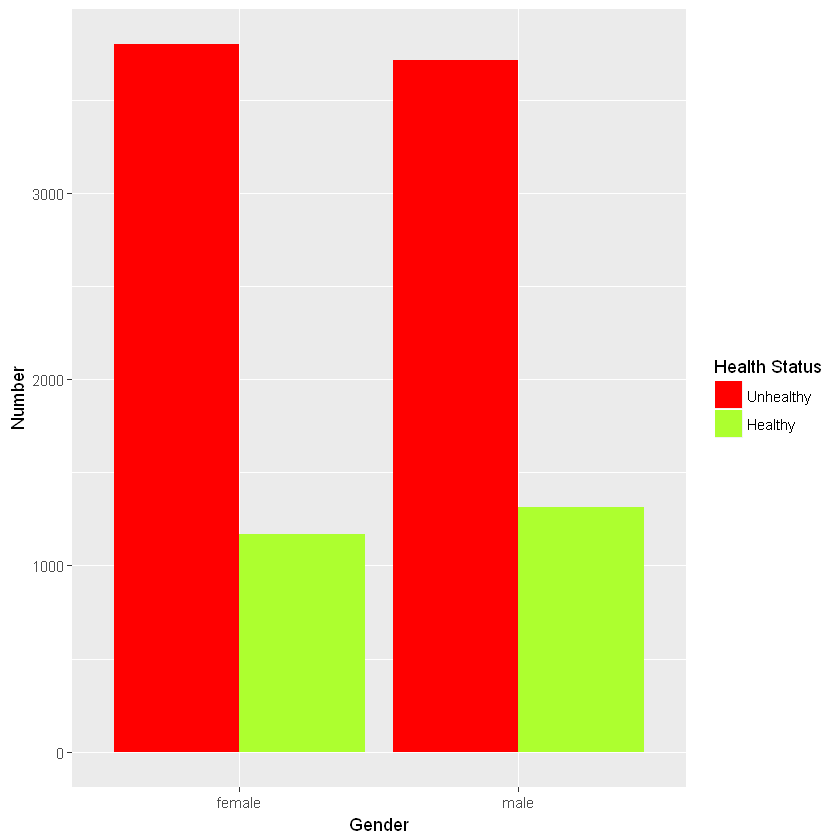

In [18]:
val = c("red1", "greenyellow")
lab = c("Unhealthy", "Healthy")
plot_data3 + 
    geom_col(position = "dodge") +
    scale_x_discrete("Gender") +
    scale_y_continuous("Number") +
    scale_fill_manual("Health Status",
                     values = val,
                     labels = lab)

End notebook